<a href="https://colab.research.google.com/github/Shanmugapriya2406/Multiple_disease_prediction/blob/main/kidney_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
kidney_df=pd.read_csv('/content/kidney_disease - kidney_disease.csv')

In [30]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [31]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [32]:
kidney_df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [33]:
kidney_df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [34]:
kidney_df.dropna(inplace=True)

In [35]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [36]:
kidney_df.shape

(158, 26)

In [37]:
kidney_df.drop('id', axis = 1, inplace= True)



In [39]:
kidney_df.index = range(0,len(kidney_df),1)
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [40]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    object 
 16  wc              158 non-null    object 
 17  rc              158 non-null    obj

In [41]:
kidney_df['pcv']=kidney_df['pcv'].astype(int)
kidney_df['wc']=kidney_df['wc'].astype(int)
kidney_df['rc']=kidney_df['rc'].astype(float)
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             158 non-null    float64
 1   bp              158 non-null    float64
 2   sg              158 non-null    float64
 3   al              158 non-null    float64
 4   su              158 non-null    float64
 5   rbc             158 non-null    object 
 6   pc              158 non-null    object 
 7   pcc             158 non-null    object 
 8   ba              158 non-null    object 
 9   bgr             158 non-null    float64
 10  bu              158 non-null    float64
 11  sc              158 non-null    float64
 12  sod             158 non-null    float64
 13  pot             158 non-null    float64
 14  hemo            158 non-null    float64
 15  pcv             158 non-null    int64  
 16  wc              158 non-null    int64  
 17  rc              158 non-null    flo

In [42]:
obj_dt = kidney_df.select_dtypes(include = 'object')
obj_dt.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
1,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes,ckd
2,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no,ckd
3,normal,abnormal,present,present,yes,yes,yes,poor,yes,no,ckd
4,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes,ckd


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in obj_dt.columns:
  kidney_df[i] = le.fit_transform(kidney_df[i])

In [44]:
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,1,1,1,0
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,1,1,0,1,0,1,0
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,1,1,0,1,1,0,0
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,1,1,1,1,1,0,0
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,1,1,1,1,1,1,0


In [50]:
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,1,1,1,1
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,1,1,0,1,0,1,1
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,1,1,0,1,1,0,1
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,1,1,1,1,1,0,1
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,0,0,0,0,0,0,0
154,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,0,0,0,0,0,0,0
155,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,0,0,0,0,0,0,0
156,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,0,0,0,0,0,0,0


In [48]:
kidney_df.replace({'classification':{'ckd\t':'ckd',0:1,1:0}},inplace=True)

In [49]:
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,1,1,1,1
1,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,1,1,0,1,0,1,1
2,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,1,1,0,1,1,0,1
3,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6,1,1,1,1,1,0,1
4,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2,1,1,1,1,1,1,1


<Axes: >

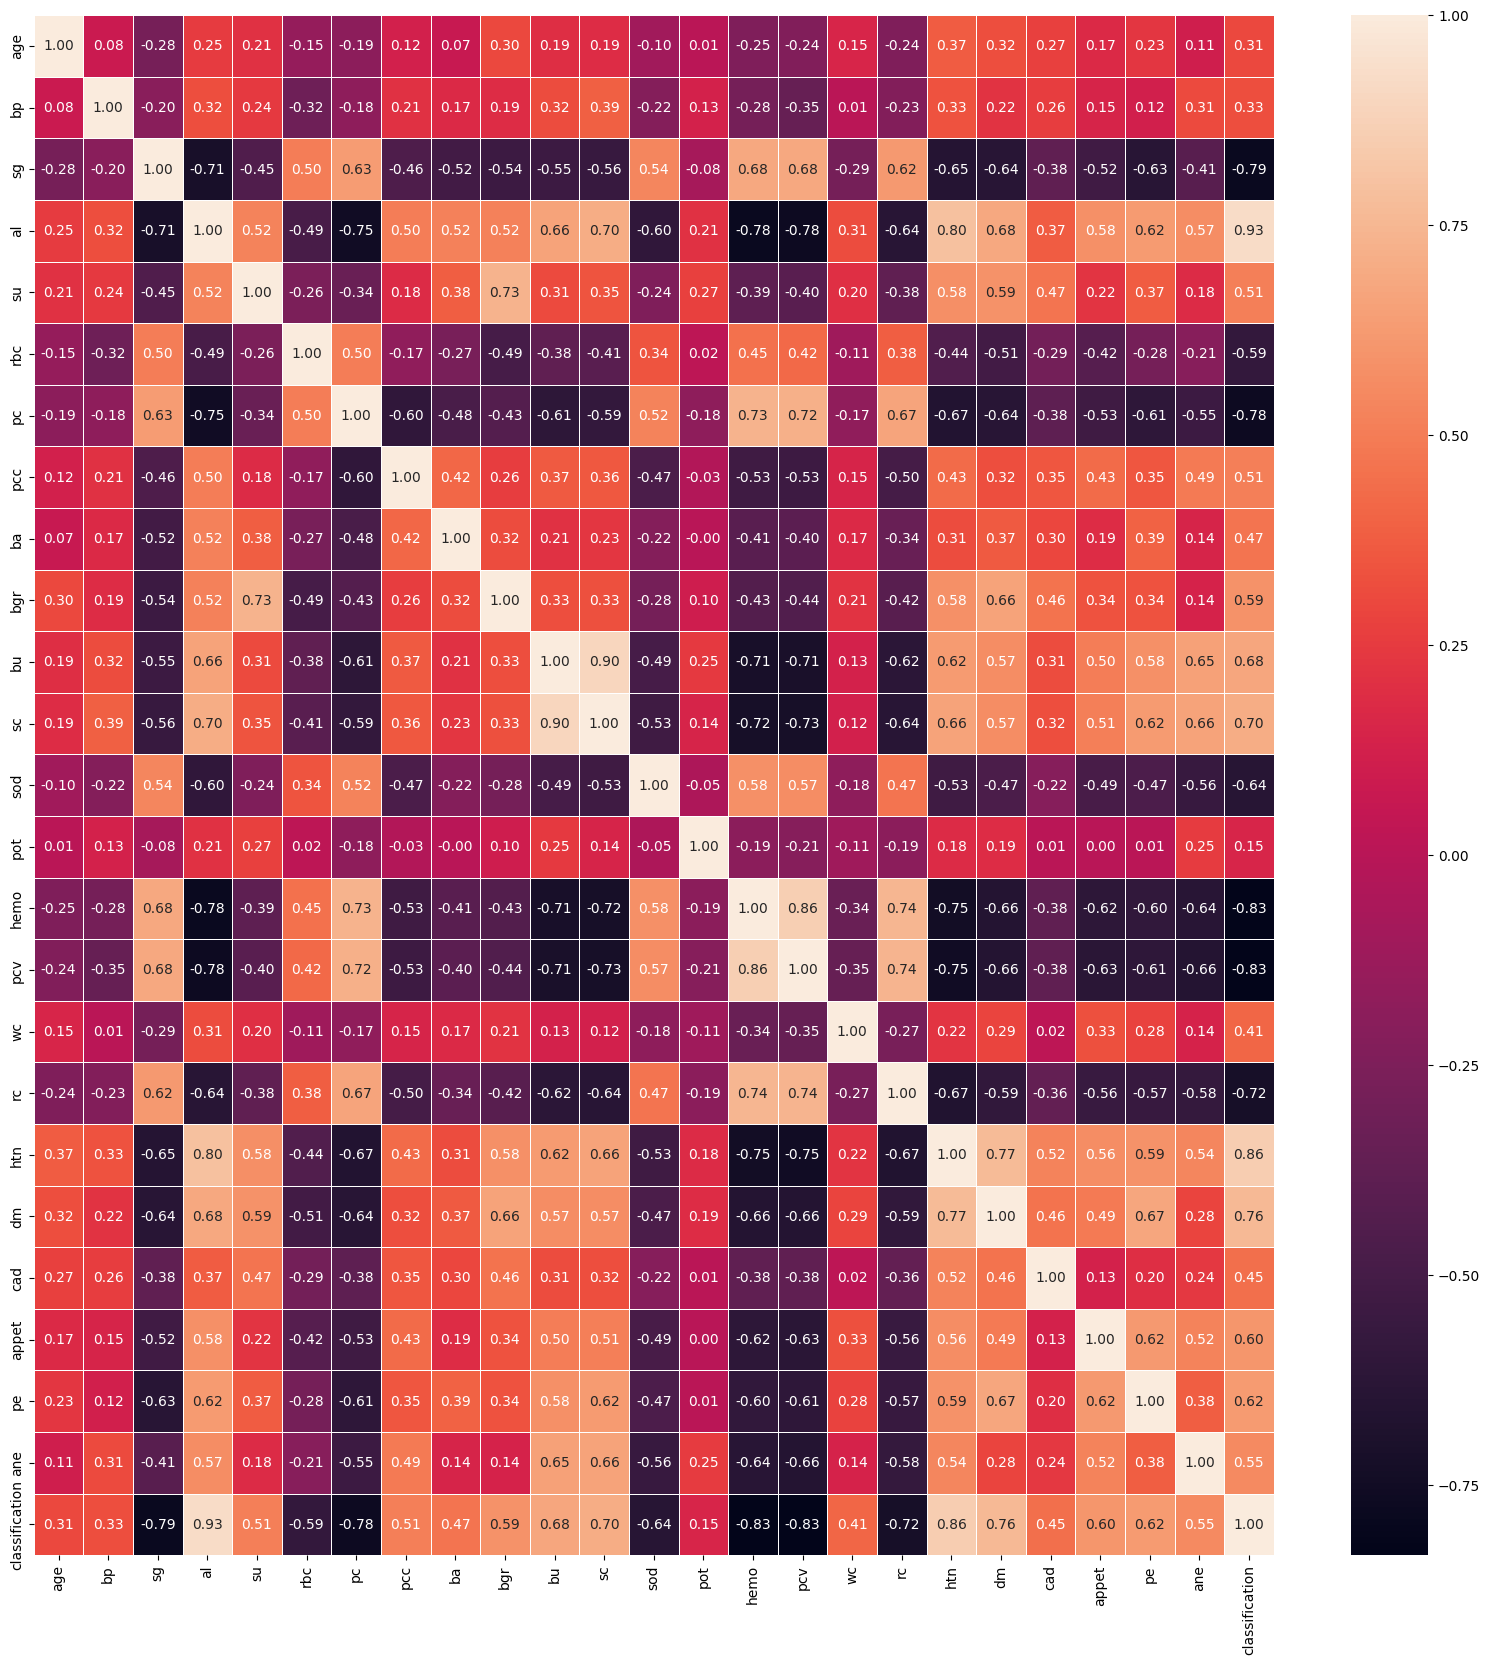

In [52]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(kidney_df.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [54]:
kidney_df.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.079712,-0.277303,0.253380,0.207711,-0.147971,-0.188907,0.124032,0.068353,0.301915,0.190636,0.189721,-0.102933,0.006866,-0.245645,-0.235116,0.153132,-0.242235,0.372348,0.323957,0.269868,0.170259,0.232327,0.105809,0.305119
bp,0.079712,1.000000,-0.198897,0.322507,0.243828,-0.316670,-0.179834,0.206507,0.174555,0.190113,0.316287,0.386551,-0.224710,0.127801,-0.282365,-0.353504,0.008274,-0.228533,0.334951,0.218096,0.257709,0.145047,0.117878,0.311097,0.326567
sg,-0.277303,-0.198897,1.000000,-0.712331,-0.448477,0.500494,0.630323,-0.460050,-0.516392,-0.544781,-0.545319,-0.563122,0.539285,-0.075057,0.682086,0.678472,-0.288930,0.619092,-0.648168,-0.639391,-0.379305,-0.523944,-0.633622,-0.413252,-0.790102
al,0.253380,0.322507,-0.712331,1.000000,0.521448,-0.489941,-0.752956,0.503341,0.516104,0.518123,0.661940,0.702889,-0.599334,0.209492,-0.784745,-0.775528,0.314574,-0.640099,0.796876,0.678582,0.374755,0.578080,0.622268,0.569529,0.925816
su,0.207711,0.243828,-0.448477,0.521448,1.000000,-0.256568,-0.335901,0.177327,0.381929,0.730050,0.312259,0.347196,-0.242491,0.271954,-0.385511,-0.404821,0.201000,-0.377726,0.577286,0.591010,0.466658,0.220547,0.374128,0.179811,0.510615
rbc,-0.147971,-0.316670,0.500494,-0.489941,-0.256568,1.000000,0.498959,-0.168592,-0.273177,-0.493857,-0.378478,-0.410408,0.344916,0.019319,0.452566,0.422537,-0.108857,0.379378,-0.442400,-0.511777,-0.293269,-0.418639,-0.282868,-0.209797,-0.586391
pc,-0.188907,-0.179834,0.630323,-0.752956,-0.335901,0.498959,1.000000,-0.600092,-0.481227,-0.430646,-0.613318,-0.588517,0.520324,-0.176150,0.733140,0.718042,-0.169936,0.667113,-0.666767,-0.636288,-0.384223,-0.528435,-0.606234,-0.545380,-0.775388
pcc,0.124032,0.206507,-0.460050,0.503341,0.177327,-0.168592,-0.600092,1.000000,0.415033,0.257768,0.366726,0.361965,-0.473954,-0.030297,-0.531182,-0.534564,0.146742,-0.499401,0.432876,0.321900,0.352255,0.432515,0.350171,0.485941,0.509915
ba,0.068353,0.174555,-0.516392,0.516104,0.381929,-0.273177,-0.481227,0.415033,1.000000,0.318095,0.205351,0.229238,-0.221374,-0.000279,-0.410353,-0.397500,0.170071,-0.343299,0.314961,0.367477,0.297063,0.187815,0.393819,0.141344,0.468845
bgr,0.301915,0.190113,-0.544781,0.518123,0.730050,-0.493857,-0.430646,0.257768,0.318095,1.000000,0.326496,0.331284,-0.284968,0.102226,-0.434158,-0.443818,0.212093,-0.418085,0.579407,0.663012,0.459164,0.338924,0.336141,0.139854,0.591217


In [56]:
x=kidney_df.drop(['classification','pcv','hemo','sod'],axis=1)
y=kidney_df['classification']


In [57]:
print(x)

      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr     bu   sc  pot  \
0    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0   56.0  3.8  2.5   
1    53.0  90.0  1.020  2.0  0.0    0   0    1   0   70.0  107.0  7.2  3.7   
2    63.0  70.0  1.010  3.0  0.0    0   0    1   0  380.0   60.0  2.7  4.2   
3    68.0  80.0  1.010  3.0  2.0    1   0    1   1  157.0   90.0  4.1  6.4   
4    61.0  80.0  1.015  2.0  0.0    0   0    0   0  173.0  148.0  3.9  5.2   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...    ...  ...  ...   
153  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0   49.0  0.5  4.9   
154  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0   31.0  1.2  3.5   
155  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0   26.0  0.6  4.4   
156  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0   50.0  1.0  4.9   
157  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.0   18.0  1.1  3.5   

        wc   rc  htn  dm  cad  appet  pe  ane  
0     6700  3.9

In [58]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
153    0
154    0
155    0
156    0
157    0
Name: classification, Length: 158, dtype: int64


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((126, 21), (32, 21), (126,), (32,))

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [61]:
input = (48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,2.5,6700,3.9,1,0,0,1,1,1)

In [62]:
input_as_numpy_array = np.asarray(input)

In [63]:
input_reshaped = input_as_numpy_array.reshape(1,-1)

In [64]:
kd_prediction = model.predict(input_reshaped)
print(kd_prediction)

if (kd_prediction[0] == 0):
  print("The Person does not have chronic kidney disease")

else:
  print("The Person has chronic kidney disease")


[1]
The Person has chronic kidney disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
import pickle

In [66]:
filename="kidney_disease_prediction.txt"
pickle.dump(model,open(filename,'wb'))

In [67]:
loaded_model = pickle.load(open('kidney_disease_prediction.txt', 'rb'))